# 1 Imports

In [52]:
import pandas as pd
import numpy as np
from datetime import datetime
from ipywidgets import fixed
import plotly.express as px

import ipywidgets as widgets
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt

# 2 Load Data

## 2.1 Dataset

In [53]:
df = pd.read_csv('kc_house_data.csv')
pd.options.display.float_format = '{:.2f}'.format
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062


## 2.2 Dtypes

In [54]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [55]:
df['date'] = pd.to_datetime(df['date']) 
df['price'] = df['price'].astype(int)

In [56]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [58]:
df = df.copy()

# 3 INSIGHTS

# H1: Imóveis com vista para a água são em média 30% mais caros

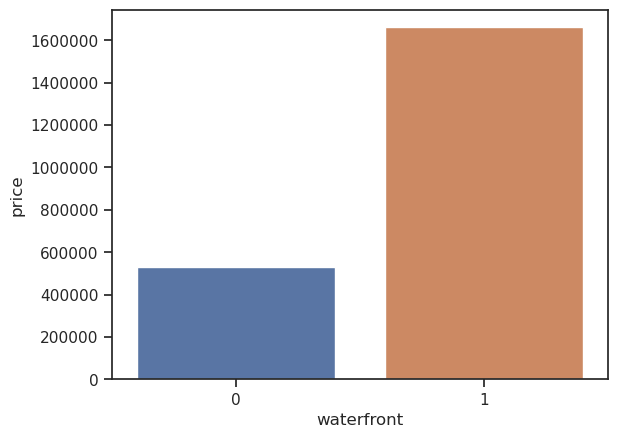

In [43]:
h1 = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()

h1['waterfront'] = h1['waterfront'].astype(str)

sns.barplot(x = 'waterfront', y = 'price', data = h1);

plt.ticklabel_format(style='plain', axis='y')

plt.show()

# H2: Imóveis com data de construção menor que 1955 são em média 50% mais baratos.

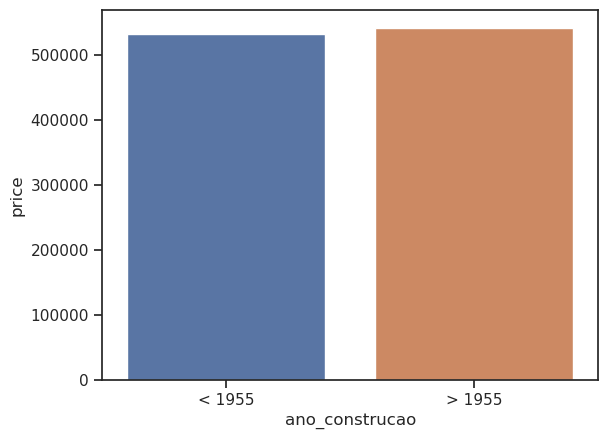

In [44]:
df['ano_construcao'] = df['yr_built'].apply(lambda x: '> 1955' if x > 1955
                                                               else '< 1955')
h2 = df[['ano_construcao', 'price']].groupby('ano_construcao').mean().reset_index()

sns.barplot(x = 'ano_construcao', y = 'price', data = h2);

plt.show()

# H3: Imóveis sem porão com maior área total são 40% mais caros

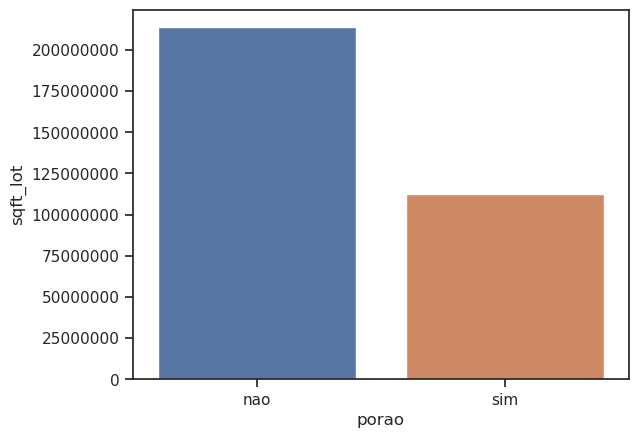

In [47]:
df['porao'] = df['sqft_basement'].apply(lambda x: 'nao' if x == 0
                                                  else 'sim')
h3 = df[['porao', 'sqft_lot', 'price']].groupby('porao').sum().reset_index()

sns.barplot(x = 'porao', y = 'sqft_lot', data = h3);

plt.ticklabel_format(style='plain', axis='y')

plt.show()

# H4: O crescimento do preço dos imóveis ano após ano (YoY) é de 10%


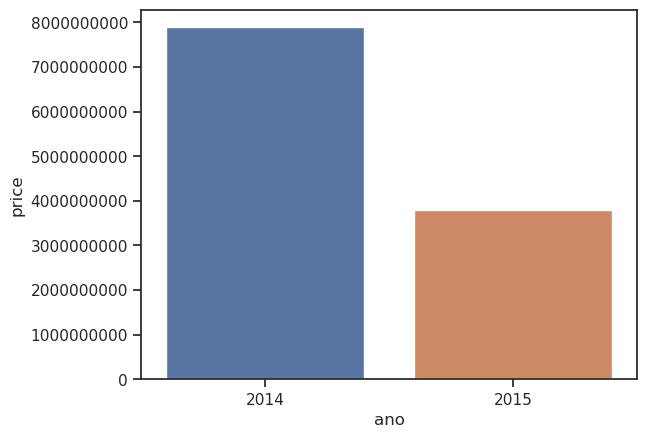

In [48]:
df['ano'] = df['date'].dt.year
h4 = df[['price', 'ano']].groupby('ano').sum().reset_index()

h4['ano'] = h4['ano'].astype(str)

sns.barplot(x = 'ano', y = 'price', data = h4);

plt.ticklabel_format(style='plain', axis='y')

plt.show() 

# H5: Imóveis com 3 banheiros tem um crescimento mês após mês (MoM) de 15%.

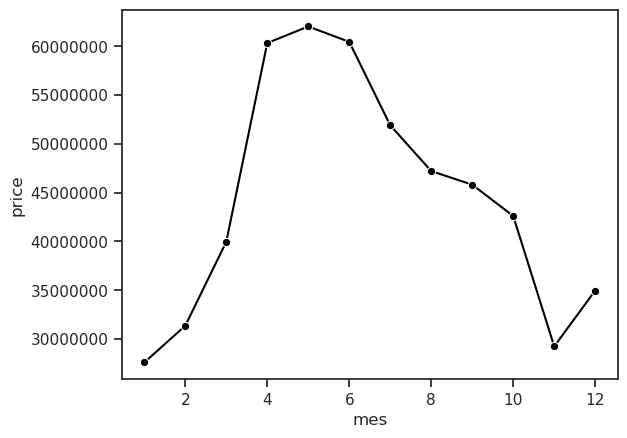

In [49]:
df['mes'] = df['date'].dt.month
h5 = df[(df['bathrooms'] == 3)]

h5 = h5[['mes', 'price']].groupby('mes').sum().reset_index()


sns.lineplot(data = h5, x = 'mes', y = 'price', markers = True, style = (1), legend = False, color = 'black');

plt.ticklabel_format(style='plain', axis='y')

plt.show()

# H6: Imóveis com mais banheiros são em média 5% mais caros.

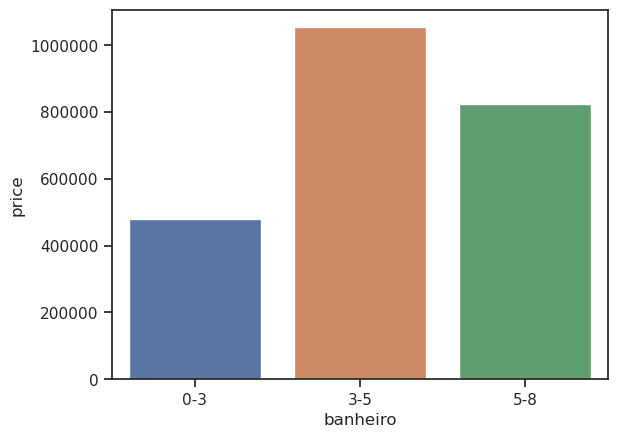

In [50]:
df['banheiro'] =  df['bathrooms'].apply(lambda x: '0-3' if (x > 0 ) & (x < 3) else
                                                   '3-5' if (x > 3) & (x < 5) else
                                                   '5-8')
h6 = df[['banheiro', 'price', 'sqft_lot']].groupby('banheiro').mean().reset_index()

sns.barplot(x = 'banheiro', y = 'price', data = h6);

plt.ticklabel_format(style='plain', axis='y')

plt.show()

# H7: O crescimento do preço dos imóveis MoM é de 10%

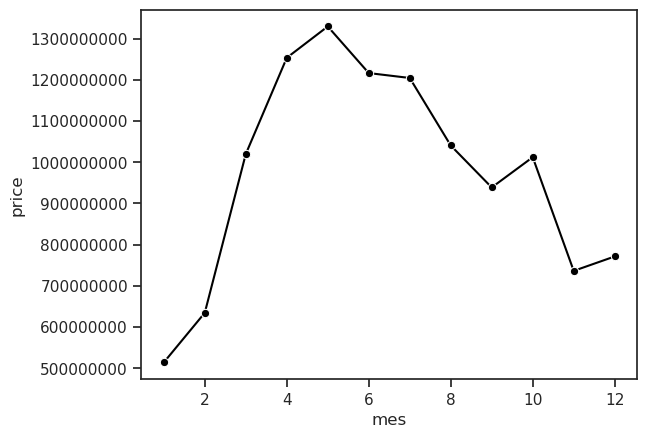

In [51]:
df['mes'] = df['date'].dt.month
df['ano'] = df['date'].dt.year
h41 =  df[['mes', 'price']].groupby('mes').sum().reset_index()

sns.set_theme(style="ticks")
sns.set_context('notebook')
sns.lineplot(data = h41, x = 'mes',  y = 'price', 
             markers = True, style = (1), legend = False, 
             color = 'black');

plt.ticklabel_format(style='plain', axis='y')

plt.show()

# 4 Respondendo as questões de negócio

## 4.1 Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

In [15]:
df = df.copy()
m = df[['zipcode', 'price']].groupby('zipcode').median().reset_index()


df2 = pd.merge(m, df, on='zipcode', how = 'inner')


df2 = df2.rename(columns = {'price_y' : 'price', 'price_x' : 'price_median'} ) 

for i, row in df2.iterrows():
    if (row['price_median'] >= row['price']) & (row['condition'] >= 2):
        df2.loc[i,'pay'] =  'sim'
    else:
        df2.loc[i, 'pay'] = 'nao'

compra = df2[df2['pay'] == 'sim']

compra['pay'].shape[0]
compra[['id', 'price', 'pay']]

,id,price,pay
0,7895500070,240000,sim
5,3353400435,230000,sim
6,9262800171,252000,sim
7,3353401710,227950,sim
8,8159610030,196000,sim
...,...,...,...
21606,2771604196,465000,sim
21607,2770601457,542300,sim
21608,2770601912,570000,sim
21611,2770601782,453000,sim


In [16]:
fil_zip = widgets.Dropdown(options = df2['pay'].unique().tolist(),
                       description = 'regiao',
                       disabled = False)


def update_map (df3, fil_zip):
    house = df2[(df2['pay'] == fil_zip)][['id', 'lat', 'long', 'condition', 'pay', 'price']] 

    mapa = px.scatter_mapbox(house, lat = 'lat', lon = 'long',  
                         size = 'price',
                         color = 'condition', opacity = 0.5, zoom = 10 )
    

    mapa.update_layout( mapbox_style = 'open-street-map')
    mapa.update_layout( height = 600, margin = {'b':0, 't':0, 'r':0, 'l': 0})
    mapa.show()

In [17]:
widgets.interactive( update_map, df3 = fixed(df2), fil_zip  = fil_zip) 

interactive(children=(Dropdown(description='regiao', options=('sim', 'nao'), value='sim'), Output()), _dom_cla…

## 4.2 Uma vez comprado, qual é o melhor momento para vendê-lo e por qual preço?

In [18]:
        
df2['season'] = df2['mes'].apply(lambda x: 'summer' if (x > 5) & (x <= 8) else
                                           'spring' if (x > 2) & (x <= 5) else
                                           'fall' if (x > 8) & (x < 12) else
                                           'winter') 


In [19]:
df3 = df2.copy()


df3 = df3[df3['pay'] == 'sim']

df4 = df3[['season', 'zipcode', 'price']].groupby(['zipcode', 'season']).median().reset_index()

df4 = df4.rename(columns = {'price' : 'price_medi_season', 'season': 'season_median'} ) 

df5 = pd.merge(df3, df4, on='zipcode', how = 'inner')

for i, row in df5.iterrows():
    if (row['price_medi_season'] > row['price']):
        df5.loc[i, 'sale'] =  row['price'] * 1.3
    else:
        df5.loc[i, 'sale'] = row['price'] * 1.1


In [20]:
df5

,zipcode,price_median,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,ano_construcao,porao,ano,mes,banheiro,pay,season,season_median,price_medi_season,sale
0,98001,260000.00,7895500070,2015-02-13,240000,4,1.00,1220,8075,1.00,...,> 1955,sim,2015,2,0-3,sim,winter,fall,215500.00,264000.00
1,98001,260000.00,7895500070,2015-02-13,240000,4,1.00,1220,8075,1.00,...,> 1955,sim,2015,2,0-3,sim,winter,spring,210500.00,264000.00
2,98001,260000.00,7895500070,2015-02-13,240000,4,1.00,1220,8075,1.00,...,> 1955,sim,2015,2,0-3,sim,winter,summer,213300.00,264000.00
3,98001,260000.00,7895500070,2015-02-13,240000,4,1.00,1220,8075,1.00,...,> 1955,sim,2015,2,0-3,sim,winter,winter,233975.00,264000.00
4,98001,260000.00,3353400435,2014-07-21,230000,3,2.00,1450,11204,1.00,...,> 1955,nao,2014,7,0-3,sim,summer,fall,215500.00,253000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43443,98199,689800.00,2770601782,2014-08-01,453000,3,2.50,1510,1618,2.50,...,> 1955,sim,2014,8,0-3,sim,summer,winter,565000.00,588900.00
43444,98199,689800.00,6821101731,2014-09-30,549000,3,2.25,1230,1380,3.00,...,> 1955,nao,2014,9,0-3,sim,fall,fall,511200.00,603900.00
43445,98199,689800.00,6821101731,2014-09-30,549000,3,2.25,1230,1380,3.00,...,> 1955,nao,2014,9,0-3,sim,fall,spring,543115.00,603900.00
43446,98199,689800.00,6821101731,2014-09-30,549000,3,2.25,1230,1380,3.00,...,> 1955,nao,2014,9,0-3,sim,fall,summer,524999.50,603900.00


In [21]:
lista2 = df5['season'].tolist()
df5[['season', 'price', 'id', 'sale']]

,season,price,id,sale
0,winter,240000,7895500070,264000.00
1,winter,240000,7895500070,264000.00
2,winter,240000,7895500070,264000.00
3,winter,240000,7895500070,264000.00
4,summer,230000,3353400435,253000.00
...,...,...,...,...
43443,summer,453000,2770601782,588900.00
43444,fall,549000,6821101731,603900.00
43445,fall,549000,6821101731,603900.00
43446,fall,549000,6821101731,603900.00


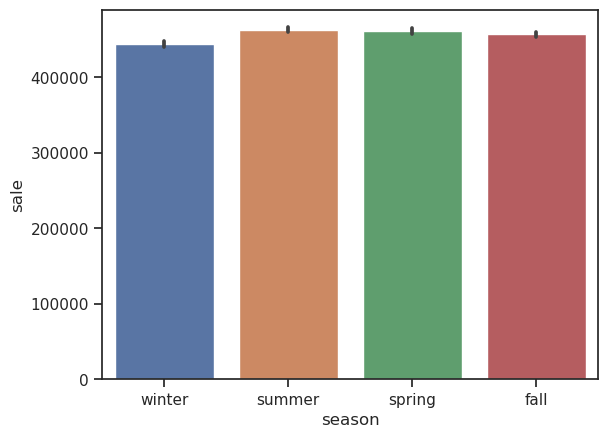

In [22]:
n = df5[['price_medi_season', 'price', 'sale', 'price_median', 'season', 'zipcode']]
n
sns.barplot(data = n, x = 'season', y = 'sale');

## 4.3 Resultado

In [23]:
df5 ['lucro'] = df5['sale'] - df5['price']
df5['lucro'].sum()

3105165061.0000005